# Quantum gates and simple circuits

Author: Alexandra Semposki

Maintainer: Alexandra Semposki

Now that you have established a working understanding of qubits, you will see below how to use them with quantum gates in simple circuits of one to two qubits. Later on, we can tackle more complicated circuits, but for now we just need a basic knowledge of how to read a quantum circuit and how to follow the qubits through the actions performed on them by the quantum gates. Being able to quickly read a quantum circuit is a wonderful skill to have and will be highly beneficial if you go on to read state of the art quantum computing research articles, where circuits can get very complex *very* rapidly.

## Two-qubit states

Before jump into the operators, gates, and simple circuits to come, we first look at the two-qubit state, a step up from the last lesson where we only dealt with a single qubit. 

Two qubit states will involve four total computational basis states, since we can combine two qubits of $|0\rangle$ and $|1\rangle$ into four different two-qubit states, such as $|01\rangle$. The full expression for the two-qubit state is given as

$$
|\psi\rangle = \alpha |00\rangle + \beta |01\rangle + \gamma |10\rangle + \delta |11\rangle,
$$

where the normalization of the state, if we only measured one qubit of the two, now is given as [1]

$$
\sum_{x\in\{0,1\}^{2}} |c_{x}|^{2} = 1,
$$

where $c$ contains all coefficients in $|\psi\rangle$ ($c \in \{\alpha, \beta, \gamma, \delta\}$), and $x$ here is a set of two numbers where either number is 0 or 1 [1]. 

This will all become clearer when we get to two-qubit Bell states (see the section [Example: Bell states](#bell_states) below). First, however, we'll deal with some single qubit gates.

## Single qubit gates

Some single-qubit gates are very familiar quantum operators that you will recognise immediately as the __Pauli matrices__. Recall that these are $\sigma_{x}$, $\sigma_{y}$, $\sigma_{z}$, and the identity, $I$. These become, respectively, $X$, $Y$, $Z$, and $I$ in quantum computing language. They are defined in matrix form as 

$$
\sigma_{x} = X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix},
$$

$$
\sigma_{y} = Y = \begin{bmatrix} 0 & i \\ -i & 0 \end{bmatrix},
$$

$$
\sigma_{z} = Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix},
$$

and

$$
I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}.
$$

These can be called in `Qiskit` to use as gates on a single qubit, which we'll look at below. 

This now requires us to discuss the classical sense of *logic gate* and compare it to the *quantum logic gate*. In classical computers, we have logic gates, i.e. the AND, NOR, and XOR gates, to name a few, which are connected to wires in the circuit. In quantum computing, we consider the wires to be the qubits and the logic gates to be operations (such as the Pauli matrices) that affect the state of the qubit. As we will see, there are quantum logic gates that are the direct quantum analog of classical logic gates, and there are some new ones, as well. For example, look at the $X$ gate above. It is the equivalent of the NOT gate in classical computing, as it flips a 0 to a 1, and a 1 to a 0, as we'll see in the circuits we construct later on. 

You may be asking yourself how this matrix works when it is clearly four values, and the qubits we have seen so far have merely been defined in basis states of $|0\rangle$ and $|1\rangle$. This works because these basis states are defined for as the vectors $|0\rangle = \begin{pmatrix}1 \\ 0\end{pmatrix}$ and $|1\rangle = \begin{pmatrix} 0 \\ 1\end{pmatrix}$. Hence, acting with a 2x2 matrix on these vectors will produce another vector, which will correspond to the altered qubit state.

---

### NOT gate

Let's use this NOT gate in a simple circuit and observe what it does to the qubit. First, we need to import the `Qiskit` package.

In [1]:
# import Qiskit (and numpy)
import qiskit
import numpy as np

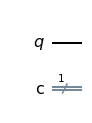

In [2]:
# build a single qubit quantum circuit with one quantum and one classical bit
qx = qiskit.QuantumCircuit(1,1)
qx.draw("mpl")

The above circuit is drawn before we've added any gates, so all we see is the single qubit wire, $q$, and the classical bit $c$, which is represented by a double line to indicate its classical nature. This bit will be crucial when it comes to measuring the circuit, a topic we'll come to soon.

Now we add the NOT gate in the form of our $X$ gate, applying it to our first (and only) qubit via the `x(0)` below.

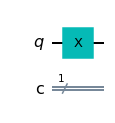

In [3]:
qx.x(0)
qx.draw("mpl")

In a `Qiskit` quantum circuit object, each qubit begins automatically with the assignment of the state $|0\rangle$, so we know that this NOT gate has converted $q$ from $|0\rangle$ to $|1\rangle$. Later on, when we measure this circuit, we will see this for ourselves.

Now let's look at how to form the other 3 Pauli matrices in circuits, and then we'll move on to some more interesting gates. 

---

### Y gate

What does the Y gate do to a qubit? We can investigate this by visualizing it on the Bloch sphere, as in the last section. Let's draw the circuit first and then look at the Bloch sphere location of the qubit before and after the Y gate was applied.

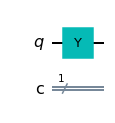

In [4]:
# construct circuit with Y gate
qy = qiskit.QuantumCircuit(1,1)
qy.y(0)
qy.draw("mpl")

Now we pull up the Bloch sphere.

In [5]:
# import statevector simulator to see qubit from circuit above
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector
from qiskit import Aer
svsim = Aer.get_backend('statevector_simulator')

Before Y gate:


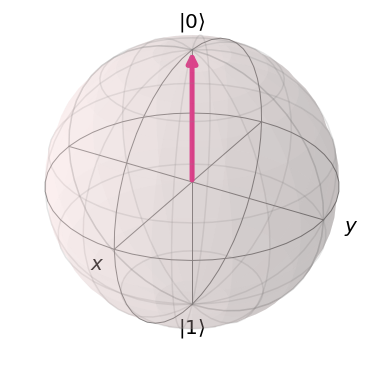

In [6]:
# Bloch sphere before Y gate
print('Before Y gate:')
plot_bloch_vector([0,0,1])

After Y gate:


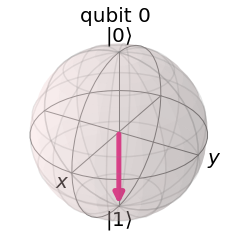

In [7]:
# Bloch sphere after Y gate
print('After Y gate:')
qobj = qiskit.assemble(qy)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

We can see from the above that this gate rotated $|0\rangle$ by $\pi$ to the $|1\rangle$ state, which is equivalent to rotating about the y axis by 180 degrees on the Bloch sphere. Because this gate involves complex numbers, in real space it looks merely like the NOT gate on the Bloch sphere, but it is indeed a whole different operator with its own unique actions. 

Now we can take a look at the final gate that will change the state of our qubit from the Pauli matrices---the $Z$ gate. 

---

### Z gate

If we scroll back up to the Pauli matrices, we see that the $Z$ gate looks like the identity matrix, except with a negative sign on the bottom right element. In the language of quantum computing, this will mean that applying this gate to a qubit will yield the same state for a basis state of $|0\rangle$, but for the state $|1\rangle$ we will get -$|1\rangle$, aka the vector's direction will flip. Let's set up the circuits for both the first and second qubit states. 

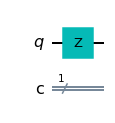

In [8]:
# set up quantum circuit for Z gate and basis |0>
qz0 = qiskit.QuantumCircuit(1,1)
qz0.z(0)
qz0.draw("mpl")

Now, to achieve the application of the $Z$ gate on the $|1\rangle$ state, we must first apply the $X$ gate to our qubit to flip it.

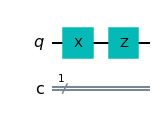

In [9]:
# set up quantum circuit for Z gate and basis |1>
qz1 = qiskit.QuantumCircuit(1,1)
qz1.x(0)
qz1.z(0)
qz1.draw("mpl")

We cannot see anything obvious here, except for the construction of our circuit, but this is useful knowledge to have going forward for when we want to construct the four Bell states, when we must be very careful about the ordering of our gates and the qubits they are acting on.

Let us now look at another couple of interesting gates. 

---

### Hadamard gate

The Hadamard gate is perhaps the most well-known gate in quantum computing. It is given in matrix form as 

$$
H = \frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1\end{bmatrix}.
$$


Why is it so useful? Because it turns the qubit states into states __halfway between__ the basis states we've already discussed. What does this look like? Applying the Hadamard gate to the $|0\rangle$ basis state, we get

$$
H|0\rangle = \frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1\end{bmatrix}\begin{pmatrix}1\\0\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\1\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\0\end{pmatrix} + \frac{1}{\sqrt{2}}\begin{pmatrix}0\\1\end{pmatrix} = \frac{|0\rangle + |1\rangle}{\sqrt{2}},
$$

and if we do the same to $|1\rangle$ we achieve

$$
H|1\rangle = \frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1\end{bmatrix}\begin{pmatrix}0\\1\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\-1\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\0\end{pmatrix} - \frac{1}{\sqrt{2}}\begin{pmatrix}0\\1\end{pmatrix} = \frac{|0\rangle - |1\rangle}{\sqrt{2}}.
$$

Hence, it creates these ''intermediate'' states. This gate also has the interesting property that $H^{2} = I$, so one possesses the original state if $H$ is applied twice [1]. 

The Hadamard gate is much more fun to visualize on the Bloch sphere, so let's do that now.

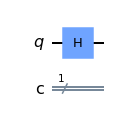

In [10]:
# quantum circuit for H gate
qh = qiskit.QuantumCircuit(1,1)
qh.h(0)
qh.draw("mpl")

After H gate:


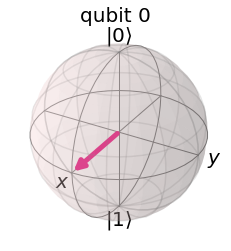

In [11]:
# plot on Bloch sphere for |0>
print('After H gate:')
qobj = qiskit.assemble(qh)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

The location of our vector above makes sense, as the Hadamard gate yields $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$ for this initial basis state, and this vector is clearly halfway between the states of $|0\rangle$ and $|1\rangle$. 

The results of the Hadamard gate on the computational basis states can be written as [2]

$$
H|0\rangle = |+\rangle
$$

and 

$$
H|1\rangle = |-\rangle,
$$

where these states are the symbols we use to define the eigenstates of the $X$ gate, and comprise the $X$ basis [2]. You'll most likely run into this notation in textbooks or papers again. 

---

Now let's look at the last couple of single qubit gates we'll want to know.

### S gate

The $S$ gate is a special case of the more general $P$ gate, which we may use in the future but will not discuss in detail now [2]. The $S$ gate is a phase gate, in that it changes the phase of the qubit it is acting on. It can be described in matrix form as

$$
S = \begin{bmatrix}1 & 0 \\ 0 & e^{\frac{i\pi}{2}}\end{bmatrix},
$$

and we can also have its Hermitian adjoint, which is given as

$$
S^{\dagger} = \begin{bmatrix}1 & 0 \\ 0 & e^{-\frac{i\pi}{2}}\end{bmatrix}.
$$

This gate will rotate a vector on the Bloch sphere by $\pi/2$, as is indicated by the angle in the exponent. Below we show a two-qubit circuit where one qubit has had the $S$ gate applied, and one the $S^{\dagger}$ gate. 

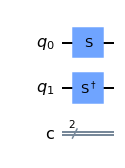

In [12]:
# quantum circuit for S gate and S dagger gate
qs = qiskit.QuantumCircuit(2,2)
qs.s(0)
qs.sdg(1)
qs.draw("mpl")

Now that we've seen some of the simpler single qubit gates, it's time to build up to two and even three qubit gates, and more complex circuits. Let's jump in with one of the most famous, the CNOT gate!

## Multiple qubit gates

### CNOT gate

The __Controlled NOT__ gate is the first two-qubit gate we've seen, and it is relatively straightforward to understand. Let's first look at how it works in a circuit.

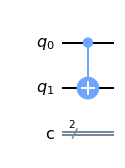

In [13]:
# CNOT circuit
qcnot = qiskit.QuantumCircuit(2,2)
qcnot.cx(0,1)
qcnot.draw("mpl")

The dot on the first qubit wire indicates the __control__ qubit, and the target shaped symbol on the second qubit wire indicates the __target__. This means that the first qubit's state determines whether the gate activates on the second qubit or not, hence the ''controlled'' in the name.

Let's think about what it means to send different computational basis states through this circuit. We'll start with the most basic, $|00\rangle$. Here we are following the convention of Qiskit, which is to consider the last value in the ket (the one farthest to the right) to be the *most significant qubit*. Hence, in the ket above, we consider the rightmost 0 to be the qubit corresponding to $q_{0}$ in the circuit above, and the leftmost 0 to correspond to $q_{1}$. 

Let's send this state through the CNOT gate and see what we get:

$$
|00\rangle \rightarrow \textrm{CNOT gate} \rightarrow |00\rangle.
$$

Now if we instead send the ket $|10\rangle$, we get

$$
|01\rangle \rightarrow \textrm{CNOT gate} \rightarrow |11\rangle.
$$

We see above that when the control qubit is set initially to 1, the CNOT gate activates, and changes the state of the target qubit. If this target qubit was originally 0, it converts to a 1, and if it was originally 1, it will convert to a 0, as seen here:

$$
|11\rangle \rightarrow \textrm{CNOT gate} \rightarrow |01\rangle.
$$

Our final state to test is $|10\rangle$, and becomes

$$
|10\rangle \rightarrow \textrm{CNOT gate} \rightarrow |10\rangle.
$$

We'll see this gate in action later on in our example where we construct [Bell states](#bell_states).

### Toffoli gate

Now that we've been introduced to the two-qubit CNOT gate, we are ready to look at another interesting multiple qubit tool, the __Toffoli gate__. This one is like an extended version of the CNOT gate, in that it possesses not one but __two__ control qubits. It can be seen below. 

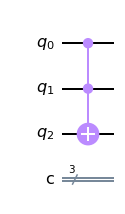

In [14]:
qct = qiskit.QuantumCircuit(3,3)
qct.ccx(0,1,2)
qct.draw("mpl")

What does this gate do? Since we can see that the third, target, qubit depends directly on the other two qubits being the same value, we can guess that this gate acts as an __NAND gate__. And, naturally, we're correct! Now let's see what happens when we send three-qubit states through this circuit. Check out the results in the truth table below [3]!

| Input (t,c2,c1) | Output (t,c2,c1) |
| :------: | :-------: |
| $|000\rangle$ | $|000\rangle$ |
| $|001\rangle$ | $|001\rangle$ |
| $|010\rangle$ | $|010\rangle$ |
| $|100\rangle$ | $|100\rangle$ |
| $|011\rangle$ | $|111\rangle$ |
| $|101\rangle$ | $|101\rangle$ |
| $|110\rangle$ | $|110\rangle$ |
| $|111\rangle$ | $|011\rangle$ |


Here 't' is the target qubit, 'c2' is the second control qubit, and 'c1' is the (most significant) control qubit. As we suspected, the target qubit is only changed when *both* of the control qubits are in the '1' state.

### SWAP gate

There is only one more gate that we'll mention here, the __SWAP gate__. This one, like some of these other multi-qubit gates, can be formed out of the gates we have already discussed, but we can also directly call the SWAP gate from the `Qiskit` circuit libraries, as we do now. 

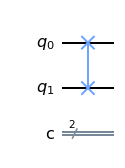

In [15]:
# SWAP gate circuit
qswap = qiskit.QuantumCircuit(2,2)
qswap.swap(0,1)
qswap.draw("mpl")

As you probably already figured out from the name, this gate serves to swap the two qubits it is connected to. This means that we're swapping the values of the qubits; if $q_{0}$ started in state $|0\rangle$ and $q_{1}$ started in state $|1\rangle$, after applying this gate we would see that $q_{0} \rightarrow |1\rangle$ and $q_{1} \rightarrow |0\rangle$.

We will not be seeing a whole lot of circuits in this book that invoke the SWAP gate, but there are plenty of places in the literature where they are used quite a lot (for example, check out this [paper](https://arxiv.org/abs/1904.12697) where the authors build a Quantum Neural Network (or QNN) with SWAP gates!). 

## Measuring qubit states in circuits

All right, it's *finally* time to get to the measurement process! Let's make a simple circuit below and put the measurement tool in. 

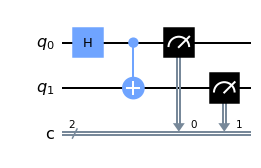

In [16]:
# measure tool in Qiskit circuits
qmeas = qiskit.QuantumCircuit(2,2)
qmeas.h(0)
qmeas.cx(0,1)
qmeas.measure(0,0)
qmeas.measure(1,1)
qmeas.draw("mpl")

That black box with what looks like an old voltmeter dial on it is the __measurement__ tool in `Qiskit`. This tool maps the state of each qubit into a corresponding classical bit, where the information can be examined by the user. Of course, as we've mentioned before, once the qubit is measured, the state of the qubit collapses from a superposition of states into one definite condition. Hence, to measure a circuit many, many times (to get that probability per possible qubit state), one must prepare a very large number of identical circuits and measure each one. 

Let's measure the circuit above with a simulator (more on that later) and see what we get!

In [17]:
# set up the number of measurements and simulator
shots = 2**13
sim = qiskit.Aer.get_backend('aer_simulator')

# transpile the circuits and run the simulator to get 
# the counts from the measurements
qc_trans = qiskit.transpile(qmeas,sim)
counts = sim.run(qc_trans, shots=shots).result().get_counts()

# print the results
print('Counts: {}'.format(counts))

Counts: {'11': 4150, '00': 4042}


As you can see, we get two different results: $|00\rangle$ and $|11\rangle$, as we would expect from using a Hadamard gate and a CNOT gate where both qubits are initialized to 0. The number of measurements for each state is close to equal; if we ran this experiment with even more shots than we have above, we'd see the number of measurements converge to a 50-50 split between the two states. 

:::{admonition} A very important note
It may seem obvious, from all of the information in this notebook, that we'd be getting only the two results above, $|00\rangle$ and $|11\rangle$. *However*, that is NOT a given in quantum computing! As we previously discussed, qubits can have *any* state in the Bloch sphere. So why do we measure just these two options? Because when we measure, we have to measure with respect to some vector on which we're __projecting__ the qubit state:

$$
p(|x\rangle) = |\langle x|\psi\rangle|^{2} \rightarrow |x\rangle = \{|0\rangle,|1\rangle\}
$$

Hence, all of our measurements have been in this $|0\rangle$, $|1\rangle$ basis, which is usually referred to the as the __computational basis__. We could measure in a different basis if we wished to, but this is the standard. These basis states are also the eigenstates of the $Z$ gate, so these are also sometimes called the $Z$-basis.
:::

## A few simple circuits

Now let's quickly look at a few interesting circuits that can be built from the ones we just learned. For example, we can create an $X$ gate from two Hadmards and a $Z$ gate, as follows. 

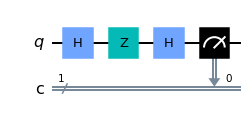

In [18]:
# X = HZH circuit
qhzh = qiskit.QuantumCircuit(1,1)
qhzh.h(0)
qhzh.z(0)
qhzh.h(0)
qhzh.measure(0,0)
qhzh.draw("mpl")

In [19]:
# check equivalence to X gate by measuring the circuit
qc_trans = qiskit.transpile(qhzh,sim)
counts = sim.run(qc_trans, shots=shots).result().get_counts()
print("Counts: {}".format(counts))

Counts: {'1': 8192}


We already know that an $X$ gate circuit gives the measured state of '1' as well, so we now know this circuit definitely creates an $X$ gate. This will come in useful later on if we want to convert from different basis states to the computational basis. 

Let's see this in action once more, with the following configuration of CNOT gates.

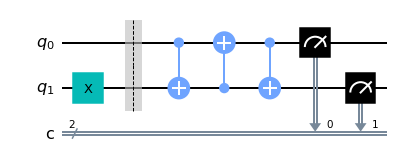

In [20]:
# equivalent SWAP circuit
qc3 = qiskit.QuantumCircuit(2,2)
qc3.x(1)
qc3.barrier()
qc3.cx(0,1)
qc3.cx(1,0)
qc3.cx(0,1)
qc3.measure(0,0)
qc3.measure(1,1)
qc3.draw("mpl")

In [21]:
# measurement
qc_trans = qiskit.transpile(qc3,sim)
counts = sim.run(qc_trans, shots=shots).result().get_counts()
print("Counts: {}".format(counts))

Counts: {'01': 8192}


Now let's do the same thing, but use a SWAP gate instead.

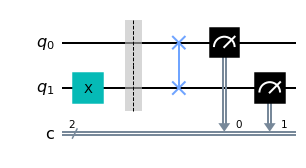

In [22]:
# real SWAP gate
qswap2 = qiskit.QuantumCircuit(2,2)
qswap2.x(1)
qswap2.barrier()
qswap2.swap(0,1)
qswap2.measure(0,0)
qswap2.measure(1,1)
qswap2.draw("mpl")

In [23]:
# measurement
qc_trans = qiskit.transpile(qswap2,sim)
counts = sim.run(qc_trans, shots=shots).result().get_counts()
print("Counts: {}".format(counts))

Counts: {'01': 8192}


In these circuits, we set an $X$ gate on $q_{1}$ so that we could see the values of the qubits swapping, and indeed we do! They both swap from the least significant to the most significant qubit, indicating the equivalence of the two circuits.

__*Universality*__: This all leads us to the question: can we build all complicated gates out of only a few simple ones? Which gates would those be? Those sets of gates which can build *all* other gates are called __universal gates__, because of this ability to reproduce any unitary operation with them [1]. Usually they come in sets, as just mentioned, but there are ones, such as the __Toffoli gate__ (which we already looked at!) that are universal on their own [4]. The Toffoli gate is considered to be a universal gate because it is able to create a NAND gate, which can be used to build any other logic gate (as you may recall from classical computing) [4]. There are many universal sets of gates in quantum computing, and we may run across more of them later in this book!

---

## Example: Bell states

<a id='bell_states'></a>

Let's look at a simple two-qubit circuit where we prepare the four Bell states below as a full example of measuring two-qubit circuits.

$$ 
|\Phi^{+}\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}
$$

$$
|\Phi^{-}\rangle = \frac{|00\rangle - |11\rangle}{\sqrt{2}}
$$

$$
|\Psi^{+}\rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}}
$$

$$
|\Psi^{-}\rangle = \frac{|01\rangle - |10\rangle}{\sqrt{2}}
$$

What are these __Bell states__? What purpose do they have? Well, they use the Hadamard and CNOT gates we just discussed individually above, and they have some very interesting properties, including quantum teleportation! They play a very important role in the EPR paradox and the recent 2022 Physics Nobel Prize (see [this comprehensive YouTube video](https://www.youtube.com/embed/9OM0jSTeeBg) from IBM Quantum for more information on Bell states and Bell's inequality).

To prepare our circuits, we set up a `QuantumCircuit` object using Qiskit and set it for 2 qubits and 2 classical bits. 

First Bell circuit:


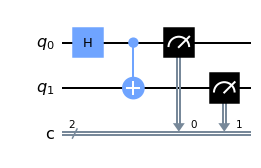

In [24]:
# first circuit
bell1 = qiskit.QuantumCircuit(2,2)
bell1.h(0)
bell1.cx(0,1)
bell1.measure(0,0)
bell1.measure(1,1)
print('First Bell circuit:')
bell1.draw("mpl")

Second Bell circuit:


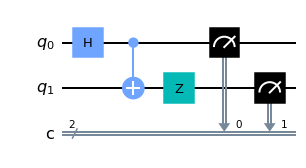

In [25]:
# second circuit
bell2 = qiskit.QuantumCircuit(2,2)
bell2.h(0)
bell2.cx(0,1)
bell2.z(1)
bell2.measure(0,0)
bell2.measure(1,1)
print('Second Bell circuit:')
bell2.draw("mpl")

Third Bell circuit:


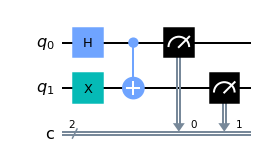

In [26]:
# third circuit
bell3 = qiskit.QuantumCircuit(2,2)
bell3.h(0)
bell3.x(1)
bell3.cx(0,1)
bell3.measure(0,0)
bell3.measure(1,1)
print('Third Bell circuit:')
bell3.draw("mpl")

Fourth Bell circuit:


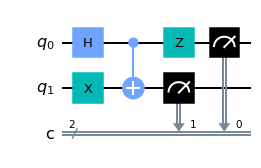

In [27]:
# fourth circuit
bell4 = qiskit.QuantumCircuit(2,2)
bell4.h(0)
bell4.x(1)
bell4.cx(0,1)
bell4.z(0)
bell4.measure(0,0)
bell4.measure(1,1)
print('Fourth Bell circuit:')
bell4.draw("mpl")

Now that we have these states established, we can put our knowledge of measuring circuits to use, and check to see if we obtain the states we expect from the four circuits above. To do this, we need to first set up the __simulator__. You may have noticed that we used a simulator earlier on, the `Qiskit.Aer` simulator, to see the statevectors from our simple circuits on the Bloch sphere. Now we'll use one of these so-called ''noiseless'' simulators to act like a quantum computer and measure this circuit many, many times. This is done, as previously discussed, to develop a probability for each state since measuring once will collapse the wavefunction and give us only one of the possible results. Hence, we measure many identical circuits using the `shots` argument of the simulator, as seen below. 

In [28]:
# measure the four circuits respectively
counts = []
qc_trans = []
shots = 2**13
sim = qiskit.Aer.get_backend('aer_simulator')
bells = [bell1, bell2, bell3, bell4]
for b in bells:
    qc_trans.append(qiskit.transpile(b,sim))

for i in qc_trans:
    counts.append(sim.run(i, shots=shots).result().get_counts())
            
for i in range(4):
    i = i+1
    print('Bell {} counts: {}'.format(i, counts[i-1]))

Bell 1 counts: {'00': 4075, '11': 4117}
Bell 2 counts: {'11': 4149, '00': 4043}
Bell 3 counts: {'01': 4096, '10': 4096}
Bell 4 counts: {'01': 4059, '10': 4133}


As expected, the first and second states contain the $|00\rangle$ and $|11\rangle$ two-qubit computational basis states, and the third and fourth states contain the $|01\rangle$ and $|10\rangle$ basis states. Later in these pages we'll see these Bell states used to compare the results of a noiseless simulator to that of a simulator using real quantum noise. For now, however, we'll move on to a short crash course on computer science and role of quantum computing within it in the present and near future. 

## References

[1] Nielsen, M. A., & Chuang, I. L. (2011). Quantum Computation and Quantum Information: 10th Anniversary Edition. Cambridge University Press.

[2] Qiskit textbook, "Single Qubit Gates" (exact page found [here](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#ynzgatez)). 

[3] Qiskit textbook, "Multiple Qubits and Entangled States" (exact page found [here](https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html#cnot)).

[4] Tom Wong, Scott Aaronson. "Lecture 16, Tues March 21: Quantum Computing, Universal Gate Sets." (PDF link [here](https://www.scottaaronson.com/qclec/16.pdf)). 